 # より実践的な前処理

In [168]:
import unittest
import doctest
import os
path = os.path.dirname(os.path.abspath(__file__))

 ## さまざまなデータの読み込み

 ### 表データの区切り文字

 #### bike.tsvの各列の意味
 |列名|意味|
 |:--|:--|
 |dteday|日付|
 |weekday|曜日（0=日,...6=土）|
 |weather_id|天気|
 |holiday|祝日フラグ（普通の土日は含めない）|
 |workingday|平日フラグ|
 |cnt|利用者数|

 #### コード10-1 bike.tsvを読み込む

In [169]:
import pandas as pd
df = pd.read_csv(path + '/data/bike.tsv')
df.head(3)

,dteday\tholiday\tweekday\tworkingday\tweather_id\tcnt
0,2011-01-01\t0\t6\t0\t2\t985
1,2011-01-02\t0\t0\t0\t2\t801
2,2011-01-03\t0\t1\t1\t1\t1349


 #### コード10-2 read_csv関数にパラメータ引数を追加する

In [170]:
df = pd.read_csv(path + '/data/bike.tsv', sep='\t')

df.head(2)

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801


 ### 文字コードの指定

 #### コード10-3 read_csv関数でweather.csvを読み込む

In [171]:
df2 = pd.read_csv(path + '/data/weather.csv')
df2.head(3)

,weather_id,weather
0,1,����
1,2,�܂�
2,3,�J


 #### コード10-4 文字コードを指定する

In [172]:
weather = pd.read_csv(path + '/data/weather.csv', encoding='shift-jis')
weather

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


 ### JSONファイルの読み込み

 #### コード10-5 JSONファイルを読み込む

In [173]:
temp = pd.read_json(path + '/data/temp.json')

temp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31


 #### コード10-6 行と列を反転させる

In [174]:
temp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


 #### tempの各列の意味
 |列名|意味|
 |:--|:--|
 |atemp|体感温度|
 |hum|湿度|
 |windspeed|風速|
 |dteday|日付|
 |temp|気温|

 ### 内部結合

 #### コード10-7 内部結合を行う

In [175]:
df2 = df.merge(weather, how = 'inner', on='weather_id')
df2.head(2)

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り


 #### コード10-8 weatherごとのcntの平均値を集計する

In [176]:
df2.groupby('weather').mean()['cnt']

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

 ### 外部結合

 #### コード10-9 tempデータフレームの200行目付近を表示する

In [177]:
temp = temp.T
temp.loc[199:201]

,atemp,dteday,hum,temp,windspeed
199,0.747479,2011-07-19,0.650417,0.776667,0.1306
200,0.826371,2011-07-21,0.69125,0.815,0.222021
201,None,2011-07-22,0.580417,0.848333,0.1331


 #### コード10-10 2011-07-20を表示する

In [178]:
df2[df2['dteday'] == '2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
370,2011-07-20,0,3,1,1,4332,晴れ


 #### コード10-11 merge関数で外部結合を行う

In [179]:
df3 = df2.merge(temp, how='left', on='dteday')

df3[df3['dteday'] == '2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
370,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


 ## より高度な欠損値の処理

 ### 線形補完

 #### コード10-12 気温に関する折れ線グラフを作成する

<Axes: >

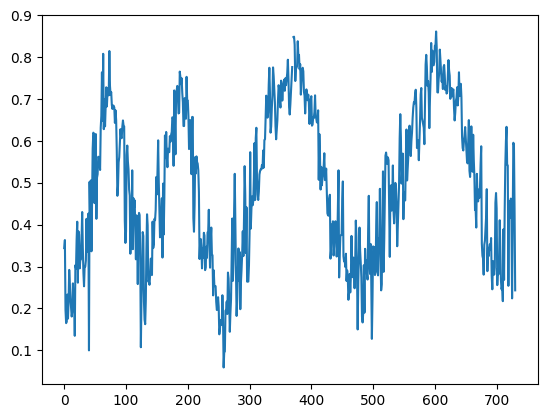

In [180]:
import matplotlib.pyplot as plt
df3['temp'].plot(kind='line')

 #### コード10-13 temp列とhum列を折れ線グラフにして比較する

<Axes: >

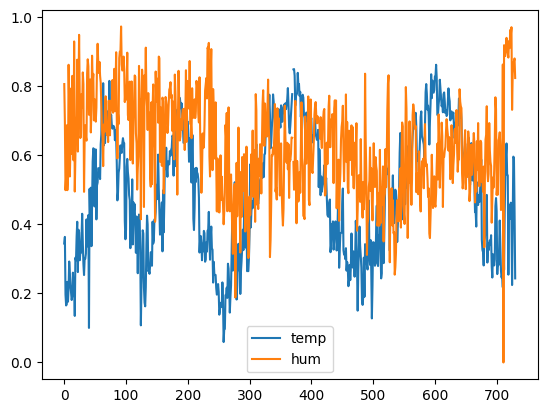

In [181]:
df3[['temp','hum']].plot(kind='line')

 #### コード10-14 plotメソッドでヒストグラムを作成する

<Axes: ylabel='Frequency'>

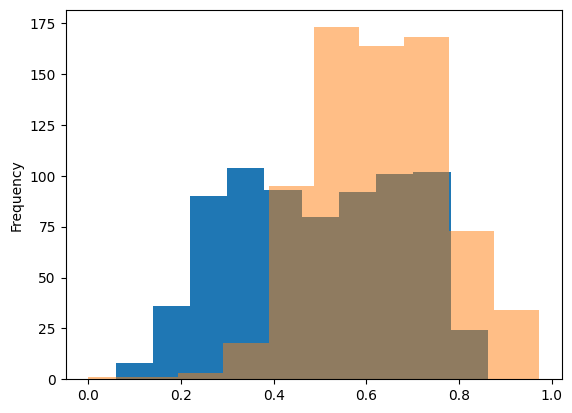

In [182]:
df3['temp'].plot(kind='hist')
df3['hum'].plot(kind='hist', alpha=0.5)

 #### コード10-15 欠損値付近の折れ線グラフを作成する

<Axes: >

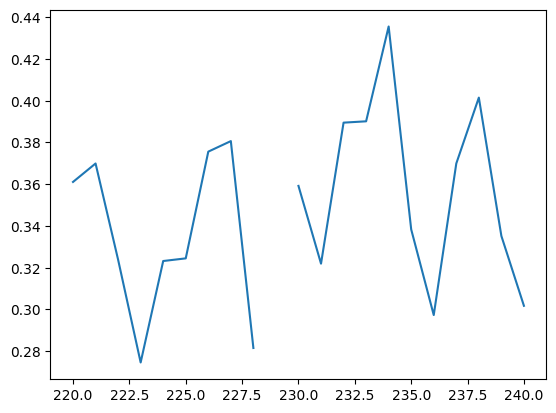

In [183]:
# インデックス220-240を抜き出して、折れ線グラフで表示
df3['atemp'].loc[220:240].plot(kind='line')

 #### コード10-16 欠損値を線形補完する

<Axes: >

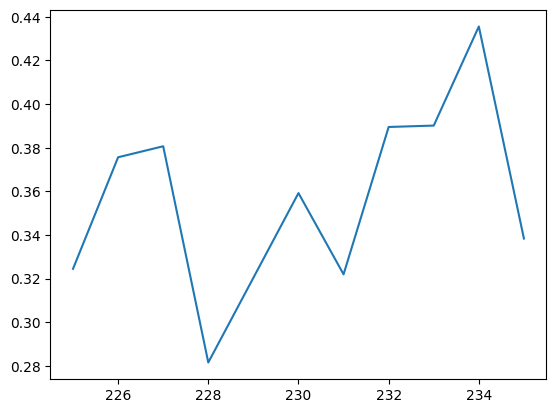

In [184]:
# atemp列の型をfloatに変換
df3['atemp'] = df3['atemp'].astype(float)
df3['atemp'] = df3['atemp'].interpolate()

df3.loc[225:235, 'atemp'].plot(kind='line')

 ### 教師あり学習による補完

 #### コード10-17 がく片長さを予測する重回帰の予測モデルを作成する

In [185]:
# 「がく片長さ」列に2個の欠損がある
iris_df = pd.read_csv(path + '/data/iris.csv')
non_df = iris_df.dropna() # 欠損値を含む行を削除
from sklearn.linear_model import LinearRegression
x = non_df.loc[:, 'がく片幅':'花弁幅']
t = non_df['がく片長さ']
model = LinearRegression()
model.fit(x, t) # 欠損値予測のためのモデルを予測

LinearRegression()

 #### コード10-18 欠損データの本来の値を予測させる

In [186]:
# 欠損値の抜き出し
condition = iris_df['がく片長さ'].isnull()
non_data = iris_df[condition]

# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data.loc[:, 'がく片幅':'花弁幅']
pred = model.predict(x)

# 欠損行のがく片長さのマスを抜き出して、predで代入
iris_df.loc[condition, 'がく片長さ'] = pred

 ## より高度な外れ値の処理

 ### マハラノビス距離

 #### コード10-19 自転車データでマハラノビス距離を計算する

In [187]:
from sklearn.covariance import MinCovDet
# 試しに適当な数値列でマハラノビス距離を計算
df4 = df3.loc[:, 'atemp':'windspeed']
df4 = df4.dropna() # 欠損値を削除
# マハラノビス距離を計算するための準備
mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(df4)
# マハラノビス距離
distance = mcd.mahalanobis(df4)
distance

array([5.27754434e+00, 2.95288431e+00, 4.56554287e+00, 1.11292894e+01,
       4.88709108e+00, 3.61583593e+00, 8.14460849e+00, 6.75556991e+00,
       2.87723941e+00, 5.21488750e+00, 3.79416537e+00, 5.40316379e+00,
       6.20213715e+00, 1.10553049e+01, 8.90271314e+00, 3.76946284e+00,
       9.37787119e+00, 8.19067907e+00, 9.96797528e+00, 4.96633549e+00,
       9.49019954e+00, 8.66205425e+00, 4.97595770e+00, 4.10070771e+00,
       1.69047652e+01, 6.72016281e+00, 4.26099138e+00, 1.44169140e+00,
       2.48070141e+00, 5.30852520e+00, 6.32167727e+00, 1.09093890e+01,
       4.97013012e+00, 2.46016070e+00, 8.26586093e+00, 1.55628115e+00,
       1.11467060e+01, 7.12123114e+00, 5.31412121e+00, 3.68894563e+00,
       1.91868229e+03, 4.79217095e+00, 6.04087328e+00, 1.83355572e-01,
       5.17790203e+00, 5.63622705e+00, 2.28418229e+00, 9.46535988e+00,
       6.11551425e+00, 2.28464022e+00, 1.26942361e+00, 7.86245236e+00,
       7.40873776e+00, 3.31990003e+00, 5.12019709e+00, 3.36617674e+00,
      

 ### 中央値を用いた外れ値の判定

 #### コード10-20 箱ひげ図で外れ値を見つける

<Axes: >

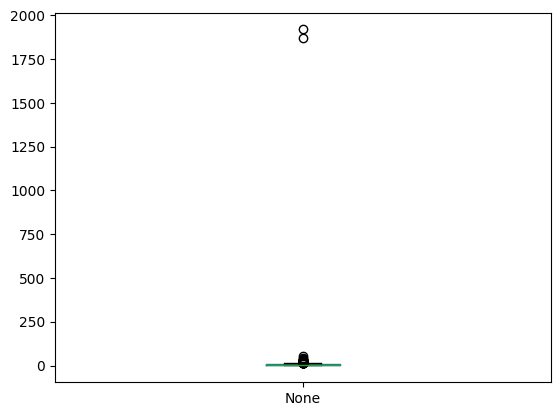

In [188]:
distance = pd.Series(distance) # シリーズに変換
distance.plot(kind='box') # 箱ひげ図

 #### コード10-21 さまざまな基本統計量を調べる

In [189]:
tmp = distance.describe() # さまざまな基本統計量を計算
tmp

count     730.000000
mean       10.571304
std        98.889470
min         0.183356
25%         2.302019
50%         3.780568
75%         6.517596
max      1918.682293
dtype: float64

 #### コード10-22 四分位範囲を用いた外れ値の判定

In [190]:
iqr = tmp['75%'] - tmp['25%'] # IQR計算
jougen = 1.5 * (iqr) + tmp['75%'] # 上限値
kagen = tmp['25%'] - 1.5 * (iqr) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outlier = distance[(distance > jougen) | (distance < kagen)]
outlier

24       16.904765
40     1918.682293
73       55.357957
81       15.463534
84       18.971056
91       23.001774
92       45.588676
94       15.758195
96       13.702627
130      12.903433
131      13.343114
147      14.180961
203      18.506569
218      14.180812
240      14.623922
243      22.325451
251      30.503908
253      17.347400
254      18.559749
257      23.277609
259      14.843623
264      13.075809
267      21.425291
272      14.908148
277      32.693499
286      16.683825
293      13.484822
375      13.154613
424      16.419222
473      14.412725
474      30.488845
480      18.619394
484      21.011948
497      38.434241
506      27.044165
515      24.183972
536      13.034591
544      13.592724
629    1867.324064
691      21.181155
706      24.551635
708      18.009731
709      20.933194
710      25.115724
711      14.380396
712      13.419876
713      12.949065
714      14.051767
715      27.473939
718      30.054611
724      14.980544
728      15.933540
729      23.

 #### データフレームの各列のデータ型（dtype）

In [191]:
se = pd.Series([1,2,3,4])
print(se.dtype) # 型の確認
se2 = se.astype(float)
print(se2.dtype) # 型の確認

int64
float64


 #### グラフの保存

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


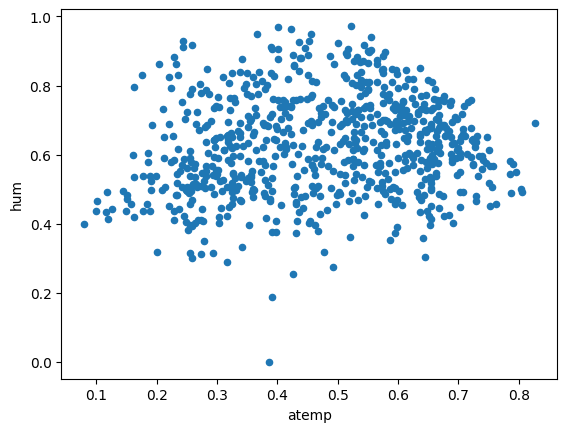

In [192]:
import matplotlib.pyplot as plt
# df4は10章で利用したデータフレーム
df4.plot(kind='scatter', x='atemp', y='hum')
plt.savefig(path + '/img/test0.png') # pngファイルとして保存

 #### subplotsによる分割

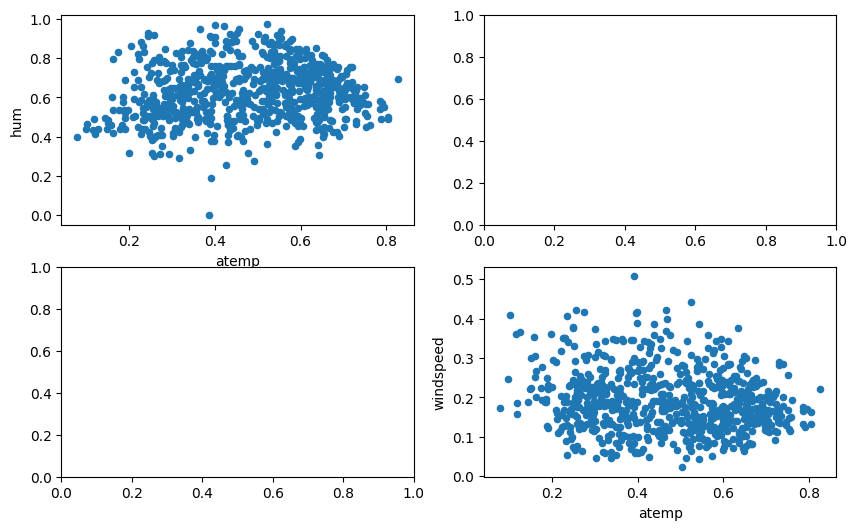

In [193]:
import matplotlib.pyplot as plt
# 1枚の画像を2行2列に分割、サイズは縦が6,横が10
fig, axes = plt.subplots(2, 2, figsize=(10,6))

# 画像内の0行0列の位置に配置
df4.plot(kind='scatter', x='atemp', y='hum', ax=axes[0,0])
# 画像内の1行1列の位置に配置
df4.plot(kind='scatter', x='atemp', y='windspeed', ax=axes[1,1])
plt.savefig(path + '/img/test1.png') # pngファイルとして保存

In [194]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
